In [1]:
#get root path and run setup file
import sys,os
root_path = os.path.abspath(os.path.join('..'))
print(root_path)
if root_path not in sys.path:
    sys.path.append(root_path)
%run -i "../lib/utils/ipynb_setup.py"
%load_ext autoreload
%autoreload 2
%matplotlib inline

/mnt/c/Users/maxpu/Dropbox/scripts/Projects/topicmod/code


Get Corpus

In [2]:
question_label = 'carbontax_q3'
year='2019'
fig_dir='../../output/figures/'+year+'/'
data_dir='../../output/data/'+year+'/'
models_dir='../../output/stm_models/'+year+'/'
restypelist=['support','oppose','notsure']
# load processed data file from disk:
fdf=pd.read_csv(data_dir+question_label+'_2019data.csv',sep='\t')

## Figure 2: response and word statistics

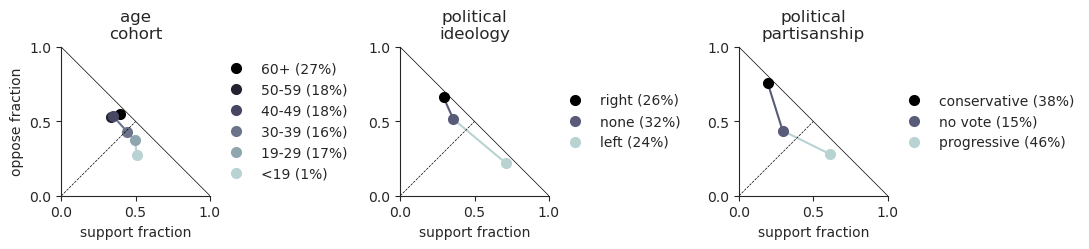

In [3]:
num_plots=3
fig,axa=pl.subplots(1,num_plots,figsize=(11 if num_plots==3 else 5*4/3,4))

for it in range(num_plots):

    if it==0:
        field_name = 'agedec'
        value_list=[ '<19','19-29', '30-39', '40-49', '50-59','60+'] #order by age
    elif it==1:
        field_name = 'partisanship'
        value_list=[ 'left','none', 'right'] #order by age
    elif it==2:
        field_name = 'partyvote'
        value_list=[ 'progressive','no vote', 'conservative'] #order by age
    else:
        field_name = 'warmingcause'
        value_list=['human','natural','notsure'] #order by age

    pycolors=pl.cm.bone(np.linspace(0, 0.8, len(value_list))) #['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    for vit,val in enumerate(value_list[::-1]):
        datatmp=fdf.loc[fdf[field_name]==val,'restype'].value_counts()
        if len(datatmp)<3:
            datatmp=datatmp[restypelist[:2]]
        else:
            datatmp=datatmp[restypelist]
        datatmp=datatmp/datatmp.sum()  
        if vit>0:
            axa[it].plot([datatmp[0],datlast[0]],[datatmp[1],datlast[1]],'-',color=pycolors[vit])
        datlast=datatmp
    for vit,val in enumerate(value_list[::-1]):
        datatmp=fdf.loc[fdf[field_name]==val,'restype'].value_counts()
        if len(datatmp)<3:
            datatmp=datatmp[restypelist[:2]]
        else:
            datatmp=datatmp[restypelist]
        datatmp=datatmp/datatmp.sum() 
        axa[it].plot([datatmp[0]],[datatmp[1]],'o',color=pycolors[vit],label=val+' ('+str(int(100*len(fdf.loc[fdf[field_name]==val])/len(fdf)))+'%)')
        datlast=datatmp

    axa[it].set_title(field_name)
    axa[it].plot([0,1],[1,0],'k-',lw=0.5)
    axa[it].plot([0,0.5],[0,0.5],'k--',lw=0.5)
    axa[it].set_xlabel('support fraction')
    axa[it].set_xlim(0,1)
    axa[it].set_ylim(0,1)
    axa[it].set_aspect('equal')
    axa[it].set_xticks([0,1/2,1])
    axa[it].set_yticks([0,1/2,1])
    axa[it].legend(frameon=False,bbox_to_anchor=(1,0.5),loc='center left',prop={"size":10})
    if it==0:
        axa[it].set_ylabel('oppose fraction')
    axa[it].spines[['right','top']].set_visible(False)
    axa[it].grid(False)

axa[0].set_title('age\ncohort')
axa[1].set_title('political\nideology')
axa[2].set_title('political\npartisanship')
pl.subplots_adjust(wspace=0)
fig.tight_layout()
# fig.savefig(fig_dir+"figure2.png", transparent=True,bbox_inches="tight",dpi=300)


Computes response type statistics

/tmp/ipykernel_310/4007568041.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  axw[1,0].set_yticklabels(['0','','0.05','','0.1'])


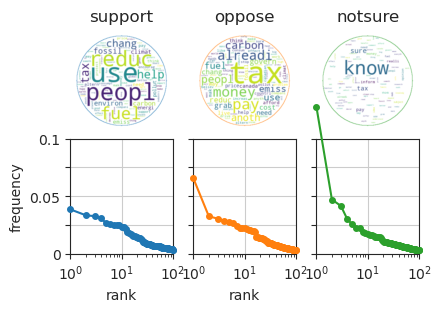

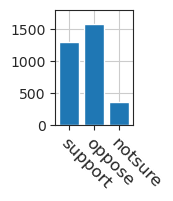

In [4]:
if True:
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.feature_extraction.text import CountVectorizer
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    from wordcloud import WordCloud
    from matplotlib.ticker import NullFormatter
    x,y =np.ogrid[:300,:300]
    mask = (x -150)**2+(y-150)**2>130**2
    mask=255*mask.astype(int)
    pycolors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    vectorizer = TfidfVectorizer(stop_words='english')    
    vecs = vectorizer.fit_transform(list(fdf.resclean.values))
    feature_names = vectorizer.get_feature_names_out()
    dense = vecs.todense()
    lst1 = dense.tolist()
    df = pd.DataFrame(lst1, columns=feature_names)
    
    for fit,field_name in enumerate(['restype']):#,'prov','partisanship','partyvote','caruse','sex','livingenv','agedec']):#,'warmingcause']):
        value_list=list(fdf[field_name].unique())
        if field_name == 'restype':
            value_list=restypelist
        if field_name == 'prov':
            value_list=['BC','AB','SK','ON','QC'] #order geographically
        if field_name == 'agedec':
            value_list=[ '<19','19-29', '30-39', '40-49', '50-59','60+'] #order by age
                        
        figw,axw=pl.subplots(2,len(value_list),figsize=(1.5*(len(value_list)),3),gridspec_kw={'wspace':0.2,'hspace':0})
        for vit,val in enumerate(value_list):
            if list(fdf.loc[fdf[field_name]==val,'resclean']):
                vectorizer = CountVectorizer(stop_words='english') 
                vecs = vectorizer.fit_transform(list(fdf.loc[fdf[field_name]==val,'resclean'].values))
                word_docfreqs = np.mean(vecs.toarray(),axis=0)
                
                vectorizer = TfidfVectorizer(stop_words='english')    
                vecs = vectorizer.fit_transform(list(fdf.loc[fdf[field_name]==val,'resclean'].values))
                feature_names = vectorizer.get_feature_names_out()
                dense = vecs.todense()
                lst1 = dense.tolist()
                df = pd.DataFrame(lst1, columns=feature_names)
                
                wc=WordCloud(background_color='white', mask=mask, max_words=100,contour_color=pycolors[vit],contour_width=0.1,relative_scaling=1)
                wc.generate_from_frequencies(df.T.sum(axis=1))

                axw[0,vit].imshow(wc,interpolation='bilinear')
                axw[0,vit].set_title(val)
                axw[0,vit].axis('off')
                normed_data=np.array(list(wc.words_.values()))/np.sum(np.array(list(wc.words_.values())))
#                 normed_data=np.sort(word_docfreqs)

                axw[1,vit].plot(np.arange(1,len(normed_data)+1),normed_data,'.-',color=pycolors[vit],clip_on=False,zorder=4)
                axw[1,vit].set_aspect('auto')
                axw[1,vit].set_xscale('log')
                axw[1,vit].set_xlim(1,100)
                axw[1,vit].set_ylim(0,0.1)
                if vit>0:
                    axw[1,vit].set_yticklabels([])

                if field_name=='restype' and vit==0:
                    restypelist_tmp=restypelist
                    if len(fdf.restype.value_counts().index)<len(restypelist):
                        restypelist_tmp=fdf.restype.value_counts().index.values
                    figres,axres=pl.subplots(figsize=(1,1.5))
                    axres.bar(np.arange(len(restypelist_tmp)),fdf.restype.value_counts()[restypelist_tmp],tick_label=restypelist_tmp)
                    axres.set_ylim(0,1800)
                    axres.set_xticks(np.arange(3),restypelist,rotation=-45,fontsize=12,ha='left',rotation_mode='anchor')
                    figres.savefig(fig_dir+"premodel_"+field_name+"_responses.png", transparent=True,bbox_inches="tight",dpi=300)
                elif field_name!='restype':
                    restypelist_tmp=restypelist
                    if len(fdf.loc[fdf[field_name]==val,'restype'].value_counts().index)<len(restypelist):
                        restypelist_tmp=fdf.loc[fdf[field_name]==val,'restype'].value_counts().index.values
                    ax = inset_axes(axw[1,vit],width='40%',height='40%',loc=1)
                    datatmp=fdf.loc[fdf[field_name]==val,'restype'].value_counts()[restypelist_tmp]
                    ax.bar(np.arange(len(restypelist_tmp)),datatmp,color=pycolors[vit])
                    ax.set_xticks(np.arange(len(restypelist_tmp)),restypelist_tmp,rotation=-45,fontsize=7,ha='left',rotation_mode='anchor')
                    axw[1,vit].text(1,1,'n='+str(datatmp.sum()),ha='right',va='bottom',transform=axw[1,vit].transAxes)


        axw[1,0].set_yticklabels(['0','','0.05','','0.1'])
        axw[1,0].set_ylabel('frequency')
        axw[1,0].set_xlabel('rank')
        axw[1,1].set_xlabel('rank')

#         figw.savefig(fig_dir+"premodel_"+field_name+"_wordclouds.png", transparent=True,bbox_inches="tight",dpi=300)

        

# Figure 3: Word frequency classification

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import NullFormatter

pycolors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

vectorizer = CountVectorizer(stop_words='english')    
word_rep=fdf.loc[fdf.restype.isin(['support','oppose']),['restype','resclean']].reset_index(drop=True)
is_target=np.array(word_rep.restype=='support')
vecs = vectorizer.fit_transform(list(word_rep.resclean.values))
feature_names = vectorizer.get_feature_names_out()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)
df.head()

,abandon,abil,abl,abrupt,absolut,absorb,absurdli,abund,abus,acceler,...,wtf,wynn,yard,ye,year,yearli,yield,young,younger,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [7]:
data = df.to_numpy()
test_frac = 0.33
sample_size = 100
max_iter = 500
model = LogisticRegression(random_state=0, max_iter=max_iter)

In [8]:
scaler = preprocessing.MaxAbsScaler().fit(data)
rescaled_data = scaler.transform(data)
scores=[]
tmp=[]
for sample in range(sample_size):
    X_train, X_test, y_train, y_test=train_test_split(rescaled_data,is_target,test_size=test_frac)
    clf=model.fit(X_train,y_train)
    tmp.append(clf.score(X_test,y_test))
scores.append(np.mean(tmp))

# print(df.columns.values[sorted_inds[:50]])
# print(df.columns.values[sorted_inds[-50:][::-1]])
#     np.save(data_dir + 'sorted_inds.npy',sorted_inds)

['tax' 'alreadi' 'govern' 'grab' 'live' 'afford' 'canada' 'anoth' 'rais'
 'countri' 'anyth' 'charg' 'expens' 'electr' 'poor' 'politician' 'wrong'
 'job' 'taxpay' 'penal' 'punish' 'china' 'collect' 'oil' 'add' 'pay'
 'absolut' 'money' 'middl' 'impos' 'cash' 'person' 'noth' 'desir' 'stop'
 'pass' 'instead' 'hurt' 'inform' 'necess' 'canadian' 'opinion' 'rest'
 'solv' 'effort' 'regardless' 'averag' 'period' 'consum' 'fact']
['climat' 'hope' 'encourag' 'environ' 'protect' 'support' 'agre' 'pollut'
 'futur' 'save' 'energi' 'awar' 'greenhous' 'perhap' 'decid' 'help' 'look'
 'idea' 'goe' 'incent' 'everyon' 'cleaner' 'reduc' 'someth' 'step' 'cut'
 'studi' 'direct' 'fossil' 'use' 'account' 'planet' 'environment'
 'pigouvian' 'prefer' 'main' 'lead' 'economist' 'damag' 'therefor' 'doubt'
 'higher' 'best' 'properli' 'worth' 'eco' 'peopl' 'decreas' 'user' 'twice']


Text(0.5, 0, 'effect size-ranked word')

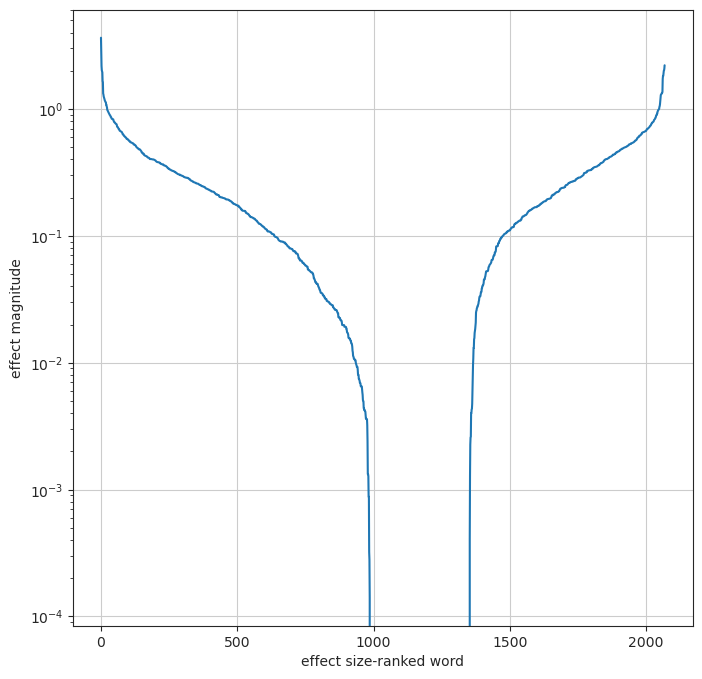

In [9]:
sorted_inds=np.argsort(clf.coef_[0])#*np.mean(data,axis=0)) #by component-weighted effect size
print(df.columns.values[sorted_inds[:50]])
print(df.columns.values[sorted_inds[-50:][::-1]])
pl.plot(np.fabs(np.sort(clf.coef_[0])))
pl.gca().set_yscale('log')
pl.gca().set_ylabel('effect magnitude')
pl.gca().set_xlabel('effect size-ranked word')
# sorted_inds=np.argsort(clf.coef_[0]*np.mean(data,axis=0)) #by component-weighted effect size
# print(df.columns.values[sorted_inds[:50]])
# print(df.columns.values[sorted_inds[-50:][::-1]])
# pl.plot(np.fabs(np.sort(clf.coef_[0]*np.mean(data,axis=0))))

In [10]:
splitvec=[test_frac]#0.01,0.05,0.1,0.2,0.4]

max_number_words=1001
step_size=25
topkvec=range(1,max_number_words+1,step_size)
topkstore=np.zeros((sample_size,int(max_number_words/step_size)+1,len(splitvec)))

for tit,topk in enumerate(topkvec):
    print(tit)
    topklist=list(sorted_inds[:topk])+list(sorted_inds[-topk:])
    datatmp=data[:,topklist]
    scaler = preprocessing.MaxAbsScaler().fit(datatmp)
    rescaled_data = scaler.transform(datatmp)
    for sit,frac in enumerate(splitvec):
        scores=[]
        for sample in range(sample_size):
            X_train, X_test, y_train, y_test=train_test_split(rescaled_data,is_target,test_size=frac,random_state=1+sample)
            clf=model.fit(X_train,y_train)
            scores.append(clf.score(X_test,y_test))
        topkstore[:,tit,sit]=scores

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


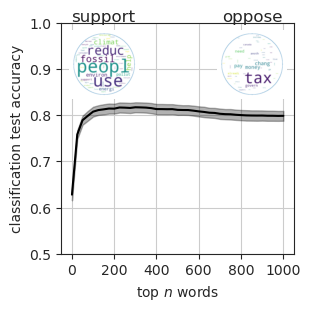

In [13]:
for sit,test_size in enumerate(splitvec):
    fig,ax=pl.subplots(figsize=(3,3))
    
    ax.fill_between(topkvec,np.mean(topkstore[:,:,sit],axis=0)-np.std(topkstore[:,:,sit],axis=0),
                    np.mean(topkstore[:,:,sit],axis=0)+np.std(topkstore[:,:,sit],axis=0),color='black',alpha=0.3,interpolate=True)
    ax.plot(topkvec,np.mean(topkstore[:,:,sit],axis=0),'k-')
    ax.set_ylim(0.5,1)
    ax.set_xticks(np.arange(0,1001,200))
    ax.set_ylabel('classification test accuracy')
    ax.set_xlabel(r'top $n$ words')
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    from wordcloud import WordCloud
    for it in range(2):
        if it==0:
            topklist=list(sorted_inds[:200])
            strvar='oppose'
        else:
            topklist=list(sorted_inds[-200:])
            strvar='support'
        x,y =np.ogrid[:300,:300]
        mask = (x -150)**2+(y-150)**2>130**2
        mask=255*mask.astype(int)
        pycolors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

        wc=WordCloud(background_color="white", mask=mask, max_words=50,contour_color=pycolors[0],contour_width=0.1,relative_scaling=1)
        
        frequencies=np.fabs(np.mean(data,axis=0))
        wc.generate_from_frequencies(dict(zip(df.columns.values[topklist],frequencies[topklist])))
        axt = inset_axes(ax,width='30%',height='30%',loc=it+1)
        axt.imshow(wc,interpolation='bilinear')
        axt.set_title(strvar)
        axt.axis('off')
    fig.savefig(fig_dir+"_accuracy_responses_maxscale.png", transparent=True,bbox_inches="tight",dpi=300)
